### Step 1: Mount the Google Drive or clone repo


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Step 2: Open the project directory



In [2]:
cd /content/drive/MyDrive/codwoe


/content/drive/MyDrive/codwoe


### Step 3: Install required packages

After installing them, Colab will require you to restart the session.

In [1]:
#Install Rustup
!apt-get update
!apt-get install -y build-essential cmake libhdf5-dev swig wget
!curl https://sh.rustup.rs -sSf | sh -s -- -y
!export PATH="$HOME/.cargo/bin:$PATH"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,731 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,235 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restrict

In [2]:
!pip install --upgrade pip setuptools wheel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [3]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [4]:
!pip install scikit-optimize==0.9.0


### Step 4: Train and Evaluate Models



#### Training

In [3]:
!python3 baseline_archs/code/revdict.py --do_train \
    --train_file data/en.train.json \
    --dev_file data/en.dev.json \
    --device cuda \
    --target_arch sgns \
    --summary_logdir baseline_archs/logs/revdict-gru-sgns \
    --save_dir baseline_archs/models/revdict-gru-sgns \
    --spm_model_path baseline_archs/models/revdict-gru-sgns


Streaming output truncated to the last 5000 lines.
Train 4:  45% 19813/43608 [00:17<00:21, 1115.39it/s]
Train 4:  46% 19951/43608 [00:17<00:20, 1159.27it/s]
Train 4:  46% 20075/43608 [00:17<00:20, 1141.91it/s]
Train 4:  46% 20199/43608 [00:17<00:20, 1147.73it/s]
Train 4:  47% 20330/43608 [00:17<00:20, 1162.23it/s]
Train 4:  47% 20456/43608 [00:17<00:20, 1130.03it/s]
Train 4:  47% 20578/43608 [00:18<00:21, 1058.71it/s]
Train 4:  47% 20704/43608 [00:18<00:20, 1101.11it/s]
Train 4:  48% 20834/43608 [00:18<00:20, 1130.72it/s]
Train 4:  48% 20970/43608 [00:18<00:19, 1176.47it/s]
Train 4:  48% 21089/43608 [00:18<00:19, 1179.72it/s]
Train 4:  49% 21217/43608 [00:18<00:18, 1198.89it/s]
Train 4:  49% 21348/43608 [00:18<00:18, 1184.48it/s]
Train 4:  49% 21481/43608 [00:18<00:18, 1212.10it/s]
Train 4:  50% 21614/43608 [00:18<00:18, 1216.26it/s]
Train 4:  50% 21744/43608 [00:19<00:19, 1131.19it/s]
Train 4:  50% 21871/43608 [00:19<00:18, 1149.13it/s]
Train 4:  50% 21995/43608 [00:19<00:18, 1156.68i

In [4]:
!python3 baseline_archs/code/revdict.py --do_train \
    --train_file data/en.train.json \
    --dev_file data/en.dev.json \
    --device cuda \
    --target_arch char \
    --summary_logdir baseline_archs/logs/revdict-gru-char \
    --save_dir baseline_archs/models/revdict-gru-char \
    --spm_model_path baseline_archs/models/revdict-gru-char

Streaming output truncated to the last 5000 lines.
Train 5:  28% 12373/43608 [00:10<00:28, 1112.48it/s]
Train 5:  29% 12498/43608 [00:10<00:27, 1140.01it/s]
Train 5:  29% 12621/43608 [00:11<00:26, 1151.00it/s]
Train 5:  29% 12747/43608 [00:11<00:27, 1103.62it/s]
Train 5:  30% 12882/43608 [00:11<00:26, 1157.94it/s]
Train 5:  30% 13006/43608 [00:11<00:26, 1172.20it/s]
Train 5:  30% 13137/43608 [00:11<00:26, 1136.68it/s]
Train 5:  30% 13259/43608 [00:11<00:27, 1113.87it/s]
Train 5:  31% 13374/43608 [00:11<00:27, 1117.13it/s]
Train 5:  31% 13489/43608 [00:11<00:27, 1076.16it/s]
Train 5:  31% 13613/43608 [00:11<00:27, 1103.69it/s]
Train 5:  31% 13727/43608 [00:12<00:27, 1096.48it/s]
Train 5:  32% 13848/43608 [00:12<00:26, 1113.39it/s]
Train 5:  32% 13962/43608 [00:12<00:26, 1106.68it/s]
Train 5:  32% 14087/43608 [00:12<00:25, 1135.49it/s]
Train 5:  33% 14201/43608 [00:12<00:26, 1097.66it/s]
Train 5:  33% 14336/43608 [00:12<00:25, 1145.97it/s]
Train 5:  33% 14453/43608 [00:12<00:26, 1086.91i

In [5]:
!python3 baseline_archs/code/revdict.py --do_train \
    --train_file data/en.train.json \
    --dev_file data/en.dev.json \
    --device cuda \
    --target_arch electra \
    --summary_logdir baseline_archs/logs/revdict-gru-electra \
    --save_dir baseline_archs/models/revdict-gru-electra \
    --spm_model_path baseline_archs/models/revdict-gru-electra

Streaming output truncated to the last 5000 lines.
Train 3:  54% 23390/43608 [00:20<00:17, 1135.95it/s]
Train 3:  54% 23513/43608 [00:20<00:17, 1133.33it/s]
Train 3:  54% 23644/43608 [00:20<00:17, 1159.51it/s]
Train 3:  55% 23769/43608 [00:20<00:17, 1150.76it/s]
Train 3:  55% 23885/43608 [00:20<00:17, 1147.08it/s]
Train 3:  55% 24006/43608 [00:20<00:17, 1117.12it/s]
Train 3:  55% 24118/43608 [00:21<00:17, 1117.73it/s]
Train 3:  56% 24241/43608 [00:21<00:17, 1122.82it/s]
Train 3:  56% 24367/43608 [00:21<00:16, 1136.43it/s]
Train 3:  56% 24481/43608 [00:21<00:17, 1088.52it/s]
Train 3:  56% 24605/43608 [00:21<00:16, 1123.71it/s]
Train 3:  57% 24718/43608 [00:21<00:16, 1115.88it/s]
Train 3:  57% 24833/43608 [00:21<00:16, 1125.36it/s]
Train 3:  57% 24960/43608 [00:21<00:16, 1136.49it/s]
Train 3:  58% 25077/43608 [00:21<00:16, 1140.69it/s]
Train 3:  58% 25202/43608 [00:22<00:16, 1130.09it/s]
Train 3:  58% 25320/43608 [00:22<00:16, 1091.97it/s]
Train 3:  58% 25437/43608 [00:22<00:16, 1084.84i

#### Testing:


In [6]:
!python3 baseline_archs/code/revdict.py --do_pred \
    --test_file data/en.test.revdict.json \
    --device cuda \
    --target_arch sgns \
    --save_dir baseline_archs/models/revdict-gru-sgns/sgns \
    --pred_file baseline_archs/models/revdict-gru-sgns/sgns/revdict_predictions_sgns.json


2025-03-11 19:53:50.620663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741722830.641973   69609 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741722830.648407   69609 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 19:53:50.669064: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-11 19:53:53,534 [DEBUG] revdict.py: Performing revdict prediction
/content/drive/MyDrive/codwoe/baseline_arch

In [7]:
!python3 baseline_archs/code/revdict.py --do_pred \
    --test_file data/en.test.revdict.json \
    --device cuda \
    --target_arch char \
    --save_dir baseline_archs/models/revdict-gru-char/char \
    --pred_file baseline_archs/models/revdict-gru-char/char/revdict_predictions_char.json

2025-03-11 19:54:15.439282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741722855.459766   69746 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741722855.466034   69746 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 19:54:15.486953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-11 19:54:18,270 [DEBUG] revdict.py: Performing revdict prediction
/content/drive/MyDrive/codwoe/baseline_arch

In [8]:
!python3 baseline_archs/code/revdict.py --do_pred \
    --test_file data/en.test.revdict.json \
    --device cuda \
    --target_arch electra \
    --save_dir baseline_archs/models/revdict-gru-electra/electra \
    --pred_file baseline_archs/models/revdict-gru-electra/electra/revdict_predictions_electra.json

2025-03-11 19:54:39.803450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741722879.824345   69872 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741722879.830722   69872 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 19:54:39.851658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-11 19:54:42,666 [DEBUG] revdict.py: Performing revdict prediction
/content/drive/MyDrive/codwoe/baseline_arch

In [9]:
!python3 code/score.py \
    baseline_archs/models/revdict-gru-char/char/revdict_predictions_char.json \
    --reference_files_dir data \
    --output_file baseline_archs/models/revdict-gru-char/char/scores.txt


2025-03-11 19:55:04,583 [DEBUG] check_output.py: File "baseline_archs/models/revdict-gru-char/char/revdict_predictions_char.json": no problems were identified.
The submission will be understood as follows:
	Submission on track revdict for language en, 6208 predictions.
	Submission predicts these embeddings: char.


In [10]:
!python3 code/score.py \
    baseline_archs/models/revdict-gru-sgns/sgns/revdict_predictions_sgns.json \
    --reference_files_dir data \
    --output_file baseline_archs/models/revdict-gru-sgns/sgns/scores.txt

2025-03-11 19:55:10,988 [DEBUG] check_output.py: File "baseline_archs/models/revdict-gru-sgns/sgns/revdict_predictions_sgns.json": no problems were identified.
The submission will be understood as follows:
	Submission on track revdict for language en, 6208 predictions.
	Submission predicts these embeddings: sgns.


In [11]:
!python3 code/score.py \
    baseline_archs/models/revdict-gru-electra/electra/revdict_predictions_electra.json \
    --reference_files_dir data \
    --output_file baseline_archs/models/revdict-gru-electra/electra/scores.txt

2025-03-11 19:55:17,329 [DEBUG] check_output.py: File "baseline_archs/models/revdict-gru-electra/electra/revdict_predictions_electra.json": no problems were identified.
The submission will be understood as follows:
	Submission on track revdict for language en, 6208 predictions.
	Submission predicts these embeddings: electra.


In [ ]:
!python3 code/score.py \
    models/revdict-KNNaug/sgns/revdict_predictions_KNNaug.json \
    --reference_files_dir data \
    --output_file models/revdict-KNNaug/sgns/scores.txt


2025-03-07 03:52:55.328767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741319575.349854   79661 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741319575.356157   79661 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 03:52:55.377021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
GroupViT models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probabil

#### Analysis

$Count_{clip} = min(Count, MaxRefCount)$


$C_{ij} = d(x_{i}^n,y_{j}^n)$



In [19]:
#Include relevant log folders for each model
run_logs = {
    'char': 'baseline_archs/logs/defmod-baseline-char',
    'sgns': 'baseline_archs/logs/defmod-baseline-sgns',
    'electra': 'baseline_archs/logs/defmod-baseline-electra',
    'concat': 'logs/defmod-concat'
}


In [22]:
import pandas as pd
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def tflog2pandas(path: str) -> pd.DataFrame:
    """Convert TensorBoard data into Pandas DataFrame.

    Args:
      path: Path to the TensorBoard event file.

    Returns:
      A pandas DataFrame containing the TensorBoard data.
    """
    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": []})
    event_acc = EventAccumulator(path)
    event_acc.Reload()
    tags = event_acc.Tags()["scalars"]
    for tag in tags:
        event_list = event_acc.Scalars(tag)
        values = list(map(lambda x: x.value, event_list))
        step = list(map(lambda x: x.step, event_list))
        r = {"metric": [tag] * len(values), "value": values, "step": step}
        df = pd.DataFrame(r)
        runlog_data = pd.concat([runlog_data, df])
    return runlog_data


all_logs = []
for run_name, path in run_logs.items():
# Search for event files in all subdirectories within the run directory
  for root, _, files in os.walk(path):
      for file in files:
          if file.startswith("events.out.tfevents"):
              event_file_path = os.path.join(root, file)

              # Process the event file
              df = tflog2pandas(event_file_path)
              df['run_name'] = run_name
              all_logs.append(df)

# Concatenate all dataframes
final_df = pd.concat(all_logs, ignore_index=True)


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metric_over_steps(df, metric_name, xlog=False, ylog=False):
    """Plots a specific metric over steps for different runs.

    Args:
        df: Pandas DataFrame containing the data.
        metric_name: The name of the metric to plot.
    """
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.lineplot(data=df[df['metric'] == metric_name], x="step", y="value", hue="run_name")
    plt.title("Cross Entropy Loss over Steps - Val")
    plt.xlabel("Step")
    plt.ylabel(metric_name)
    plt.legend(title="Run Name")
    if xlog:
      plt.xscale('log')
    if ylog:
      plt.yscale('log')
    plt.show()

In [17]:
final_df['metric'].unique().tolist()

['defmod-train/lr',
 'defmod-train/xent_smooth',
 'defmod-train/xent',
 'defmod-train/acc',
 'defmod-dev/xent',
 'defmod-dev/acc']

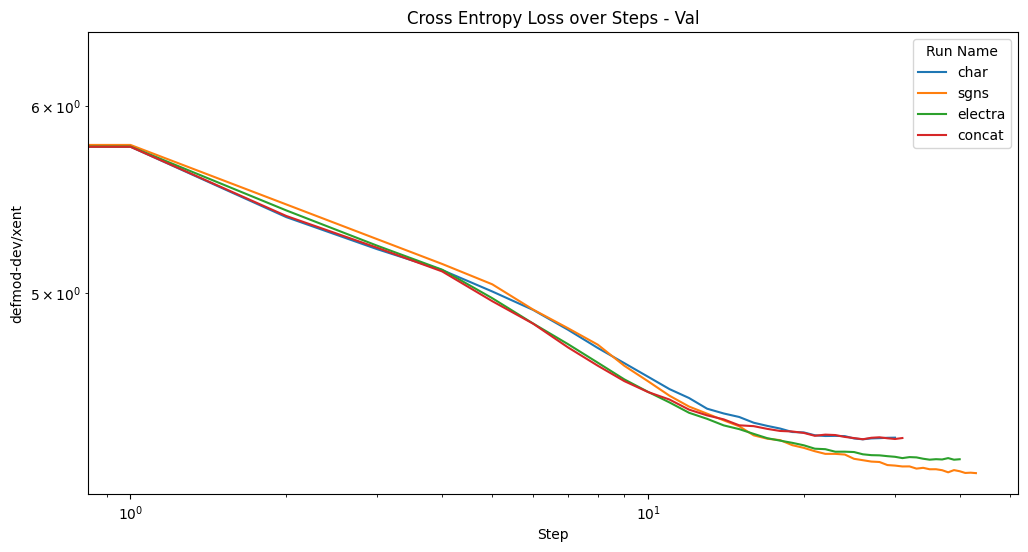

In [26]:
plot_metric_over_steps(final_df, 'defmod-dev/xent', xlog=True, ylog=True)

All runs: ['Baseline' 'KNNaug']
Runs at max step: ['KNNaug']
Runs in max_step_data: ['Baseline' 'KNNaug']


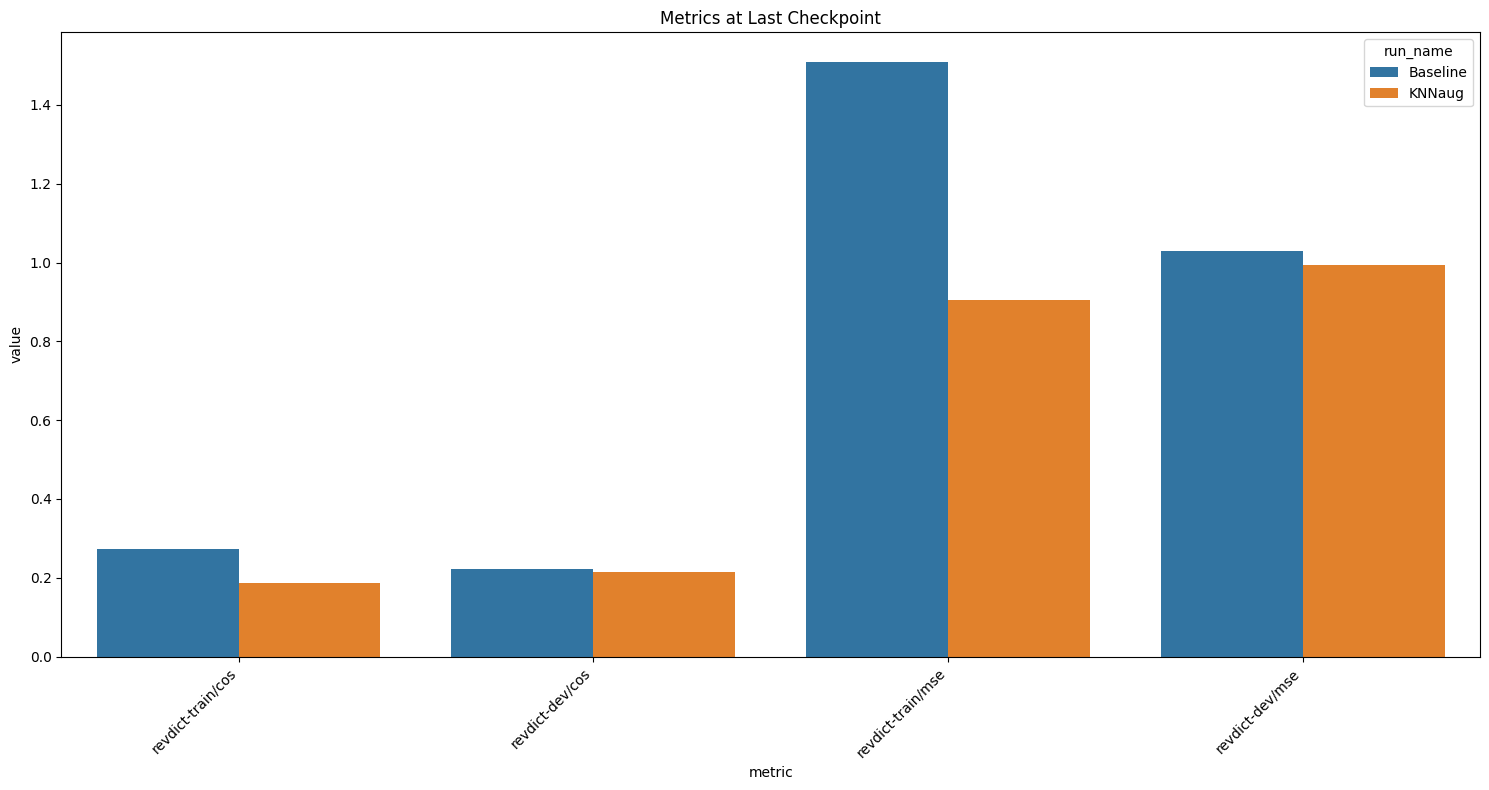

In [ ]:

import numpy as np

last_step_metrics = []
for metric in ['cos', 'mse']:
  for group in ['revdict-train', 'revdict-dev']:
    col_name = f'{group}/{metric}'
    last_step_metrics.append(col_name)

#if runs go to same max step (constant num epochs across runs)
max_step = np.max(final_df['step'])
#max_step_data = final_df[final_df['step'] == max_step]

#elif runs have different end step
#max_step_data = final_df.sort_values('step').groupby('run_name').tail(1)
max_step_data = (
    final_df
    .sort_values('step')
    .groupby(['run_name', 'metric'])
    .tail(1)
)
max_step_data = max_step_data[max_step_data['metric'].isin(last_step_metrics)]

#print("All runs:", final_df['run_name'].unique())
#print("Runs at max step:", final_df[final_df['step'] == max_step]['run_name'].unique())
#print("Runs in max_step_data:", max_step_data['run_name'].unique())

# Reshape the data for plotting, handling missing values
plot_df = max_step_data.pivot(index='run_name', columns='metric', values='value')

# Get the actual columns present in plot_df
available_metrics = plot_df.columns.tolist()

# Filter last_step_metrics to include only available metrics
value_vars = [metric for metric in last_step_metrics if metric in available_metrics]

# Melt the DataFrame to long format, using only available metrics
plot_df = pd.melt(plot_df.reset_index(), id_vars=['run_name'], value_vars=value_vars)
plot_df.columns = ['run_name', 'metric', 'value']

# Create the bar plot using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(data=plot_df, x='metric', y='value', hue='run_name')
plt.xticks(rotation=45, ha='right')
plt.title('Metrics at Last Checkpoint')
plt.tight_layout()
plt.show()

In [ ]:
plot_df.pivot(index='run_name', columns='metric', values='value')[last_step_metrics]


metric,revdict-train/cos,revdict-dev/cos,revdict-train/mse,revdict-dev/mse
run_name,,,,
Baseline,0.273558,0.221406,1.509007,1.028326
KNNaug,0.187356,0.215035,0.904335,0.994935
